# Python Lab 05b: Ricerca degli Iper-parametri
## Francesco Della Santa, Matematica per l'Intelligenza Artificiale, Politecnico di Torino

Come visto nelle scorse esercitazioni, diversi valori/scelte di iper-parametri possono dare risultati notevolmente differenti. Diventa quindi importante determinare quali di essi costituiscano la miglior combinazione rispetto ai risultati desiderati per il modello di apprendimento.

## Richiamo: Training Set, Validation Set e Test Set

Dato un dataset di coppie features-target 
$$\mathcal{D} = \{(\boldsymbol{x}_1, \boldsymbol{y}_1),\ldots ,(\boldsymbol{x}_D, \boldsymbol{y}_D)\}\subset\mathbb{R}^n\times\mathbb{R}^m\,,$$

per esempio per un problema di classificazione in $m$ classi, per addestrare un modello di Machine Learning (ML) generalmente si divide $\mathcal{D}$ in un _training set_ $\mathcal{T}$ ed un _test set_ $\mathcal{P}$ tali che:
1. le coppie $(\boldsymbol{x}, \boldsymbol{y})$ in $\mathcal{T}$ vengono utilizzate per addestrare il modello ed "insegnargli" l'operazione desiderata (p.e., la classificazione rispetto $m$ classi);
2. le coppie $(\boldsymbol{x}, \boldsymbol{y})$ in $\mathcal{P}$ vengono utilizzate per _quantificare_ quanto bene un modello addestrato abbia imparato l'operazione desiderata, rispetto un'arbitraria funzione di valutazione.

**RICORDA:** ovviamente $\mathcal{P}$ deve essere utilizato _solo ed esclusivamente per la valutazione delle performance_! Ogni suo coinvolgimento nelle operazioni di addestramento renderebbe meno affidabili le performance misurate su di esso.

### Il Validation Set

In molti casi, è tuttavia utile disporre di una previsione delle possibili performance su $\mathcal{P}$ per un modello, per esempio quando:
1. si deve eseguire una ricerca degli iper-parametri ottimali per il problema;
2. si deve monitorare l'andamento di un addestramento caratterizzato da un processo iterativo;
3. ecc.

Nei casi sopra citati, risulta quindi utile dividere $\mathcal{D}$ non in due, ma in tre sottoinsiemi: training set $\mathcal{T}$, *validation set* $\mathcal{V}$ e test set $\mathcal{P}$. 
Mentre $\mathcal{T}$ e $\mathcal{P}$ svolgono i soliti ruoli, il validation set $\mathcal{V}$ funge da "pre-test set", cioè viene utilizzato per svolgere le operazioni sopra citate, generalmente misurando le performance di modelli addestrati su $\mathcal{T}$ per avere una (sovra)stima delle possibili performance "finali" su $\mathcal{P}$.

Concentriamoci sul punto (1) dell'elenco sovrastante e assumiamo di avere $K$ modelli $\hat{f}_1,\ldots ,\hat{f}_K$ caratterizzati da $K$ diverse combinazioni di iper-parametri. In poche parole, il procedimento di ricerca del miglior modello rispetto $\mathcal{T}$, $\mathcal{V}$ e $\mathcal{P}$ è il seguente:
1. addestro ogni modello $\hat{f}_1,\ldots ,\hat{f}_K$ su $\mathcal{T}$;
2. valuto su $\mathcal{V}$ le performance dei modelli addestrati $\hat{f}_1,\ldots ,\hat{f}_K$ ed indentifico il migliore;
3. misuro le performance del modello migliore su $\mathcal{P}$ per avere una stima delle sue performance in generale nel futuro.

**NOTA BENE:** nella pratica, il validation set è sempre quello con cardinalità minore, cioè: $|\mathcal{V}|<|\mathcal{T}|,|\mathcal{P}|$; per questo motivo le performance su $\mathcal{V}$ sono generalmente una sovrastima di quelle su $\mathcal{P}$.

**ATTENZIONE:** in letteratura spesso i termini _validation set_ e _test set_ hanno un significato molto "fluido". La definizione e l'utilizzo sopra descritti sono la versione più comune ed utilizzata in ambito ML; tuttavia, si posono incontrare alcune altre convenzioni:
1. in ambito di ML, può capitare di sentir parlare solamente di training e validation set. In questo caso, il validation set svolge il ruolo di quello che noi abbiamo definito test set. Un'estensione di questa convenzione è il caso della $k$_-fold cross-validation_ (non la affronteremo in questa esercitazione, lasciato per casa lo studio della sua applicazione nel contesto degli argomentio di questo notebook);
2. in ambito Deep Learning (DL) o reti neurali in generale, il modello viene addestrato rispetto $\mathcal{T}$ e $\mathcal{V}$ e valutato su $\mathcal{P}$. In particolare, il validation set $\mathcal{V}$ viene utilizzato per "regolarizzare/gestire" l'addestramento della rete. Per la ricerca di iper-parametri ottimali, si mettono quindi a confronto le performance su $\mathcal{P}$ (e non su $\mathcal{V}$ come indicato sopra). Quindi, se si desidera avere una valutazione oggettiva della rete neurale con la miglior combinazione di iper-parametri, si valutano le performance su un secondo test set $\mathcal{P}'$ (una sorta di "test set finale"), ancora diverso da $\mathcal{T}$, $\mathcal{V}$ e $\mathcal{P}$. Generalmente questa seconda valutazione non viene fatta poiché i dataset $\mathcal{D}$ (ed i test set $\mathcal{P}$) usati nel DL sono solitamente molto grandi e quindi le performance su $\mathcal{P}$ si possono assumere essere praticamente uguali a quelle che si avrebbero su $\mathcal{P}'$.

## La Ricerca a Griglia

Per cercare la miglior combinazione di iper-parametri per un modello, si procede generalmente con una _ricerca a griglia_ (in inglese e in letteratura: "_grid search_").

Dato cioè un intervallo _discreto_ di valori $I_h$ per ogni iperparametro $p_h$, $h=1,\ldots , H$, si considera la griglia di punti generata dal prodotto cartesiano degli intervalli, cioè:
$$G = I_1 \times \cdots \times I_H\,.$$

Abbiamo quindi che ogni punto di $G$ rappresenta una possibile combinazione di iper-parametri per il modello.
Secondo quanto scritto sopra, si considerano quindi i $K=|G|$ modelli caratterizzati dalle $K$ combinazioni di iper-parametri differenti e si cerca quello con le migliori performance su $\mathcal{V}$.

**NOTA BENE:** nella pratica gli intervalli discreti $I_h$ sono raramente equispaziati, preferendo un campionamento casuale determinato da distribuzioni di probabilità.

## Strumenti di Scikit-Learn per Iperparametri e Performance

Per implementare la grid search, nell'esercitazione di oggi, utilizzare il seguente strumento:
- GridSearcgCV: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
- Esempio/guida: https://scikit-learn.org/stable/modules/grid_search.html

**OSSERVAZIONE:** per utilizzi più "elaborati", che facciano uso di distribuzioni di probabilità, lo studente può guardare anche altri strumenti, per esempio RandomizedSearchCV (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html).

Per implementare il calcolo della matrice di confusione, della precision, della recall e  dell' $F_1$-score, utilizzare i seguenti strumenti:
- $F_1$-score: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html
- Precision: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html
- Recall: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html
- make_scorer (generare una delle funzioni sopra, fissando dei parametri): https://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html
- scoring parameters: https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
- Confusion Matrix: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html


## SVM Nonlineari e Classificazione Non Binaria

La classe SVC di sklearn fa uso del metodo One-VS-One (OVO) per la classificazione non binaria (cioè $m>2$ classi).
Il metodo consiste nell'addestrare $\begin{pmatrix}m\\ 2\end{pmatrix} = \frac{m !}{2!(m-2)!}=\frac{m(m-1)}{2}$ SVM non lineari per ogni possibile coppia di classi. La classificazione di un vettore $\boldsymbol{x}$ avviene quindi scegliendo come classe predetta la classe $\widehat{y}$ che risulta essere predetta dalla maggioranza delle $\begin{pmatrix}m\\ 2\end{pmatrix}$ SVM.

Un'alternativa per la classificazione non binare è lo schema One-VS-Rest (OVR), che addestra $m$ SVM rispetto al problema di classificazione binaria $C_i$ / non-$C_i$, per ogni $i=1,\ldots ,m$. La classificazione di un vettore $\boldsymbol{x}$ avviene quindi scegliendo come classe predetta la classe $\widehat{y}$ che risulta essere predetta tra le varie SVM o, più generalmente e in caso di "ambiguità", scegliendo la classe $\widehat{y}$ predetta con "maggior sicurezza" tra le $m$ SVM addestrate.

**ATTENZIONE:** La classe SVC di sklearn fa _SEMPRE_ uso del metodo OVO per l'addestramento. Il metodo *decision_function* di default è invece impostato su _'ovr'_ per semplicità di lettura. Specificatamente, anche se le SVM sono addestrate rispetto lo schema OVO, se il metodo *decision_function* è impostato su _'ovr'_ allora esegue una trasformazione monotona sulla classificazione del metodo OVO per restituire una classificazione sullo stile OVR (quindi più semplice da leggere per l'utente).

# Esercitazione: Riconoscimento Volti

Nell'esercitazione di oggi, implementeremo una grid-search per SVM nonlineari per la classificazione dei volti già visti nell'esercitazione "PCAeigenfaces" e parte del dataset "Labeled Faces in the Wild" (LFW).

**ATTENZIONE:** Per dettagli sul dataset utilizzato, guardare la vecchia esercitazione.

In [1]:
# ***** NOTA BENE! *****
# perché %matplotlib widget funzioni, installare nell'ambiente virtuale 
# il pacchetto ipympl con il comando:
# pip install ipympl
#
# ATTENZIONE: perché funzioni è necessario chiudere e rilanciare jupyter-lab
#
# STILE DI VISUALIZZAZIONE PLOT FATTI CON MATPLOTLIB
%matplotlib widget
#
#
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, make_scorer
from IPython.display import display

# Il codice presente di seguito serve nel caso si verifichi un errore del tipo
#
# "URLError: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1124)>"
#
# al momento di chiamare la funzione fetch_lfw_people di sklearn.datasets
#
# ATTENZIONE: il codice di seguito non è quindi sempre necessario; se non lo fosse, commentarlo pure.
#

import os, ssl

if (not os.environ.get('PYTHONHTTPSVERIFY', '') and getattr(ssl, '_create_unverified_context', None)):
    ssl._create_default_https_context = ssl._create_unverified_context

## Importazione del Dataset e Creazione di Training, Validation e Test set

Importiamo il dataset $\mathcal{D}$ da scikit-learn e dividiamolo in $\mathcal{T}$, $\mathcal{V}$ e $\mathcal{P}$. Utilizzare le seguenti percentuali:
1. $|\mathcal{T}| = 30\% |\mathcal{D}|$
1. $|\mathcal{V}| = 20\% |\mathcal{D}|$
1. $|\mathcal{P}| = 50\% |\mathcal{D}|$

**ATTENZIONE:** visto che andremo ad usare le SVM, _NON_ sarà necessario trasformare le classi secondo la codifica del one-hot encoding.

**ATTENZIONE:** per poter utilizzare al meglio la classe di _sklearn_ per la gridsearch, non suddivideremo il dataset direttamente in Training, Validation e Test set, ma "estrarremo" gli indici corrispondenti e determinanti tali insiemi.

**ESERCIZIO:** completare il codice nella cella seguente.

In [10]:
lfw_people = datasets.fetch_lfw_people(min_faces_per_person=70, resize=0.4)

face_data = lfw_people['data']
face_images = lfw_people['images']
face_tnames = lfw_people['target_names']
face_targets = lfw_people['target']

# Creare gli indici dei dati corrispondenti a training, validation e test set secondo le percentuali sopra indicate.
# Utilizzare i seguenti nomi per le variabili:
# Dataset: indices
# Training: ind_train
# Validation: ind_val
# Test: ind_test

random_state = 42
test_p = 0.5
val_p = 0.4
indices = np.arange(face_data.shape[0])

ind_trainval, ind_test = train_test_split(indices, test_size=test_p, random_state=random_state, shuffle=True)
ind_train, ind_val = train_test_split(ind_trainval, test_size=val_p, random_state=random_state, shuffle=True)

## Grid Search ed SVM

**ESERCIZIO:** completare il codice nella cella seguente. Impostare una ricerca a griglia per gli iper-parametri delle SVM. In particolare, cercare tra i seguenti valori:
1. $C\in\{2^i \ | \ i=-2, \ldots , 2\}$;
2. $\gamma \in \{\frac{1}{i\cdot n} \ | \ i= 0.5, 1, 1.5 \}$, dove $n$ è il numero di feature del dataset;
3. $\mathrm{kernel} \in \{\mathrm{RBF}, \mathrm{sigmoid}, \mathrm{polynomial}, \mathrm{linear}\}$.

In [11]:
n_features = face_data.shape[1]

# Definizione delle liste di valori tra i quali "scorrere" per gli iper-parametri:
C_list = [2 ** i for i in range(-2, 3)]
gamma_list = [1 / (i * n_features) for i in np.arange(0.5, 1.75, 0.5)]
ker_list = ['rbf', 'poly', 'sigmoid', 'linear']

# DIZIONARIO "SEMPLICE":
# hparameters = {'kernel':ker_list, 'C':C_list, 'gamma':gamma_list}
# ESERCIZIO EXTRA: 
# DEFINIRE hparameters IN MODO DA EVITARE DI PROVARE kernel='linear' CON PARAMETRI CHE NON LO RIGUARDANO
hparameters = [
    {'kernel':ker_list[-1:], 'C':C_list},
    {'kernel':ker_list[:-1], 'C':C_list, 'gamma':gamma_list}
]

svm = SVC(class_weight='balanced')

svm_gs = GridSearchCV(estimator=svm, 
                      param_grid=hparameters,
                      scoring='f1_weighted',
                      return_train_score=True,
                      # refit=True,  <-------------------- SOSTITUIBILE CON FUNZIONI PER PERSONALIZZARE refit, MA INEVITABILE (default True)
                      cv=zip([ind_train], [ind_val]))

# OSSERVAZIONE: in alternativa a scoring='f1_weighted', si poteva scrivere equivalentemente
# scoring=f1_scorer, dove f1_scorer è una variabile definita tramite make_scorer, cioè:
# f1_scorer = make_scorer(f1_score, average='weighted')

svm_gs.fit(face_data, face_targets)

GridSearchCV(cv=<zip object at 0x000001B3E63448C0>,
             estimator=SVC(class_weight='balanced'),
             param_grid=[{'C': [0.25, 0.5, 1, 2, 4], 'kernel': ['linear']},
                         {'C': [0.25, 0.5, 1, 2, 4],
                          'gamma': [0.001081081081081081, 0.0005405405405405405,
                                    0.00036036036036036037],
                          'kernel': ['rbf', 'poly', 'sigmoid']}],
             return_train_score=True, scoring='f1_weighted')

In [12]:
# Mostriamo i risultati della Gridsearch con una tabella:

df_results = pd.DataFrame(svm_gs.cv_results_)

display(df_results.sort_values(['rank_test_score'], ascending=True))

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,param_gamma,params,split0_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,mean_train_score,std_train_score
1,0.065004,0.0,0.028561,0.0,0.5,linear,NaN,"{'C': 0.5, 'kernel': 'linear'}",0.790422,0.790422,0.0,1,1.000000,1.000000,0.0
2,0.064999,0.0,0.028001,0.0,1,linear,NaN,"{'C': 1, 'kernel': 'linear'}",0.790422,0.790422,0.0,1,1.000000,1.000000,0.0
3,0.064999,0.0,0.028004,0.0,2,linear,NaN,"{'C': 2, 'kernel': 'linear'}",0.790422,0.790422,0.0,1,1.000000,1.000000,0.0
4,0.064999,0.0,0.029027,0.0,4,linear,NaN,"{'C': 4, 'kernel': 'linear'}",0.790422,0.790422,0.0,1,1.000000,1.000000,0.0
0,0.069211,0.0,0.025999,0.0,0.25,linear,NaN,"{'C': 0.25, 'kernel': 'linear'}",0.788000,0.788000,0.0,5,0.992242,0.992242,0.0
41,0.099974,0.0,0.140027,0.0,4,rbf,0.001081,"{'C': 4, 'gamma': 0.001081081081081081, 'kerne...",0.572087,0.572087,0.0,6,0.724579,0.724579,0.0
44,0.105003,0.0,0.132996,0.0,4,rbf,0.000541,"{'C': 4, 'gamma': 0.0005405405405405405, 'kern...",0.412045,0.412045,0.0,7,0.569940,0.569940,0.0
42,0.099996,0.0,0.034000,0.0,4,poly,0.001081,"{'C': 4, 'gamma': 0.001081081081081081, 'kerne...",0.389784,0.389784,0.0,8,0.475595,0.475595,0.0
32,0.106030,0.0,0.137969,0.0,2,rbf,0.001081,"{'C': 2, 'gamma': 0.001081081081081081, 'kerne...",0.373828,0.373828,0.0,9,0.545929,0.545929,0.0
33,0.100993,0.0,0.031000,0.0,2,poly,0.001081,"{'C': 2, 'gamma': 0.001081081081081081, 'kerne...",0.311238,0.311238,0.0,10,0.317459,0.317459,0.0


## Performance della Miglior SVM

**ESERCIZIO:** calcolare (e visualizzare) di seguito le performance della miglior SVM trovata con la gridsearch, cioè:
1. Accuratezza su $\mathcal{T}$, $\mathcal{V}$ e $\mathcal{P}$;
2. Precision (average='weighted') su $\mathcal{T}$, $\mathcal{V}$ e $\mathcal{P}$;
3. Recall (average='weighted') su $\mathcal{T}$, $\mathcal{V}$ e $\mathcal{P}$;
4. $F_1$-score (average='weighted') su $\mathcal{T}$, $\mathcal{V}$ e $\mathcal{P}$;
5. Matrice di Confusione su $\mathcal{P}$ (senza normalizzazione, normalizzata rispetto le vere classi, normalizzara rispetto le classi predette).

**ATTENZIONE:** la miglior SVM _deve essere ri-addestrata_ su $\mathcal{T}$!!! La classe GridSearchCV, a fine procedimento, addestra infatti il miglior modello sulle coppie input-output in argomento al metodo fit; nel nostro caso, addestra cioè su tutto $\mathcal{D}$. Questa operazione è dovuta al fatto che la classe è stata pensata principalmente per l'uso di default con la cross-validation.

In [13]:
# Calcolo delle predizioni sul test set.
# Nomi delle variabili:
#
# X_train: matrice dei volti (vettorizzati) del training set;
# X_val: matrice dei volti (vettorizzati) del validation;
# X_test: matrice dei volti (vettorizzati) del test set
#
# y_pred_train: vettore delle predizioni sul training;
# y_true_train: vettore dei target "veri" del training set;
# y_pred_val: vettore delle predizioni sul validation;
# y_true_val: vettore dei target "veri" del validation set;
#
# y_pred: vettore delle predizioni sul test;
# y_true: vettore dei target "veri" del test set

X_train = face_data[ind_train, :]
X_val = face_data[ind_val, :]
X_test = face_data[ind_test, :]

y_true_train = face_targets[ind_train]
y_true_val = face_targets[ind_val]
y_true = face_targets[ind_test]

# Ri-addestramento della miglior SVM (NECESSARIO A CAUSA DI REFIT)
svm_gs.best_estimator_.fit(X_train, y_true_train)  # <------------------------------------- IMPORTANTE!

y_pred_train = svm_gs.best_estimator_.predict(X_train)
y_pred_val = svm_gs.best_estimator_.predict(X_val)
y_pred = svm_gs.best_estimator_.predict(X_test)

acc_train = svm_gs.best_estimator_.score(X_train, y_true_train)
prec_train = precision_score(y_true_train, y_pred_train, average='weighted')
rec_train = recall_score(y_true_train, y_pred_train, average='weighted')
f1_train = f1_score(y_true_train, y_pred_train, average='weighted')

acc_val = svm_gs.best_estimator_.score(X_val, y_true_val)
prec_val = precision_score(y_true_val, y_pred_val, average='weighted')
rec_val = recall_score(y_true_val, y_pred_val, average='weighted')
f1_val = f1_score(y_true_val, y_pred_val, average='weighted')

acc = svm_gs.best_estimator_.score(X_test, y_true)
prec = precision_score(y_true, y_pred, average='weighted')
rec = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

df_perf = pd.DataFrame({'Accuracy': [acc_train, acc_val, acc], 
                        'Precision': [prec_train, prec_val, prec], 
                        'Recall': [rec_train, rec_val, rec],
                        'F1': [f1_train, f1_val, f1]
                       },
                      index=['training', 'validation', 'test'])

cmat = confusion_matrix(y_true, y_pred, labels=svm_gs.best_estimator_.classes_)
cmat_norm_true = confusion_matrix(y_true, y_pred, labels=svm_gs.best_estimator_.classes_, normalize='true')  # recall_confusion_matrix
cmat_norm_pred = confusion_matrix(y_true, y_pred, labels=svm_gs.best_estimator_.classes_, normalize='pred')  # precision_confusion_matrix

df_cmat = pd.DataFrame(cmat, columns=face_tnames, index=face_tnames)
df_cmat_norm_true = pd.DataFrame(cmat_norm_true, columns=face_tnames, index=face_tnames)
df_cmat_norm_pred = pd.DataFrame(cmat_norm_pred, columns=face_tnames, index=face_tnames)

display(df_perf)
display(df_cmat)
display(df_cmat_norm_true)
display(df_cmat_norm_pred)

,Accuracy,Precision,Recall,F1
training,1.000000,1.000000,1.000000,1.000000
validation,0.794574,0.805771,0.794574,0.790422
test,0.784161,0.783882,0.784161,0.781479


,Ariel Sharon,Colin Powell,Donald Rumsfeld,George W Bush,Gerhard Schroeder,Hugo Chavez,Tony Blair
Ariel Sharon,25,7,5,0,1,0,1
Colin Powell,2,97,0,7,0,0,5
Donald Rumsfeld,3,6,45,6,0,1,2
George W Bush,1,15,7,240,7,2,4
Gerhard Schroeder,0,2,4,4,28,4,5
Hugo Chavez,0,3,0,8,4,20,2
Tony Blair,0,1,3,14,3,0,50


,Ariel Sharon,Colin Powell,Donald Rumsfeld,George W Bush,Gerhard Schroeder,Hugo Chavez,Tony Blair
Ariel Sharon,0.641026,0.179487,0.128205,0.000000,0.025641,0.000000,0.025641
Colin Powell,0.018018,0.873874,0.000000,0.063063,0.000000,0.000000,0.045045
Donald Rumsfeld,0.047619,0.095238,0.714286,0.095238,0.000000,0.015873,0.031746
George W Bush,0.003623,0.054348,0.025362,0.869565,0.025362,0.007246,0.014493
Gerhard Schroeder,0.000000,0.042553,0.085106,0.085106,0.595745,0.085106,0.106383
Hugo Chavez,0.000000,0.081081,0.000000,0.216216,0.108108,0.540541,0.054054
Tony Blair,0.000000,0.014085,0.042254,0.197183,0.042254,0.000000,0.704225


,Ariel Sharon,Colin Powell,Donald Rumsfeld,George W Bush,Gerhard Schroeder,Hugo Chavez,Tony Blair
Ariel Sharon,0.806452,0.053435,0.078125,0.000000,0.023256,0.000000,0.014493
Colin Powell,0.064516,0.740458,0.000000,0.025090,0.000000,0.000000,0.072464
Donald Rumsfeld,0.096774,0.045802,0.703125,0.021505,0.000000,0.037037,0.028986
George W Bush,0.032258,0.114504,0.109375,0.860215,0.162791,0.074074,0.057971
Gerhard Schroeder,0.000000,0.015267,0.062500,0.014337,0.651163,0.148148,0.072464
Hugo Chavez,0.000000,0.022901,0.000000,0.028674,0.093023,0.740741,0.028986
Tony Blair,0.000000,0.007634,0.046875,0.050179,0.069767,0.000000,0.724638


## Alcuni Esempi Visivi

Mostriamo visivamente come viene fatta la classificazione multi-classe. 

**RICORDA:** la classe SVC non addestra un'unica SVM (se $m>2$); in realtà esegue il metodo "One-VS-One", addestrando quindi $\begin{pmatrix}m \\ 2\end{pmatrix}$ SVM per ogni coppia di classi. La predizione su $\boldsymbol{x}$ restituisce quindi la classe $\widehat{y}$ se questa è la classe predetta in maggioranza tra tutte le SVM "interne".

**In Scikit-Learn:** con le opzioni di default utilizzate nel codice sopra, il metodo "decision_function" di una SVC multiclasse è impostato su "ovr" (vedi sezione sopra su classificazione non binaria per SVM). Per ogni $\boldsymbol{x}$, il metodo in questione restituisce quindi un vettore di $m$ elementi, dove l'$i$-esimo elemento ha valore maggiore se l'$i$-esima classe è quella predetta maggiormente dalle SVM "interne". 

**ATTENZIONE:** questi valori non sono né percentuali né interi, sono il risultato di una trasformazione eseguita da scikit-learn per "elaborare" più facilmente il risultato delle predizioni fatte dalle SVM "interne".

C:\Users\andre\AppData\Local\Temp\ipykernel_13012\3315924601.py:24: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axs = plt.subplots(1, 2, figsize=(8, 3))


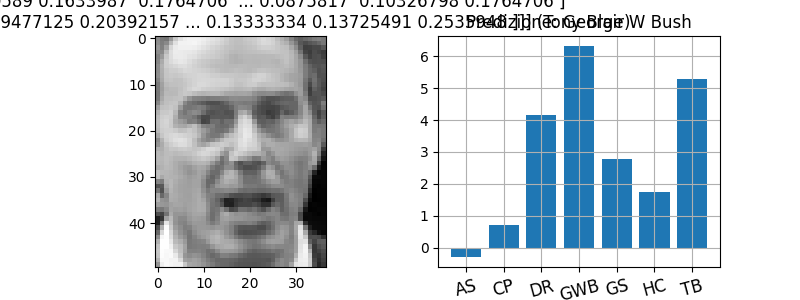

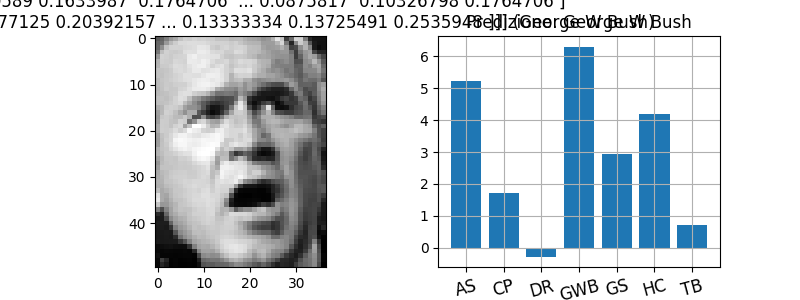

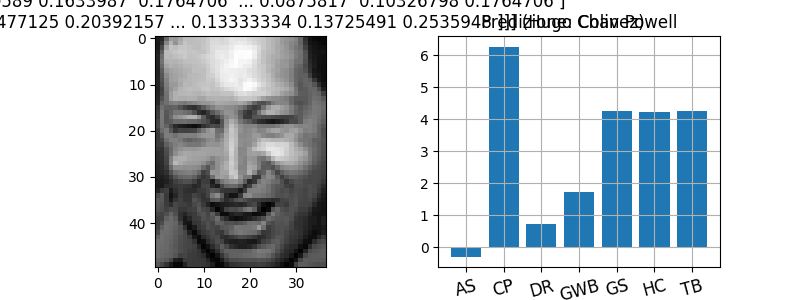

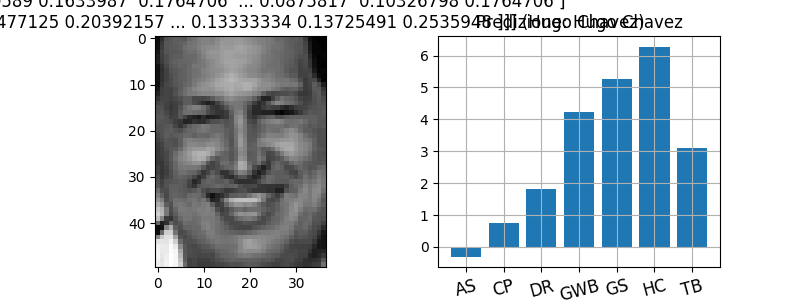

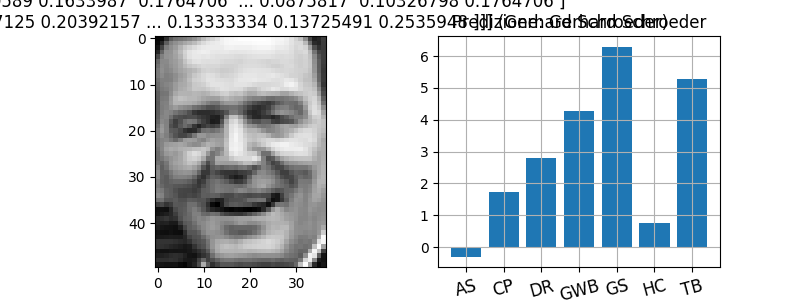

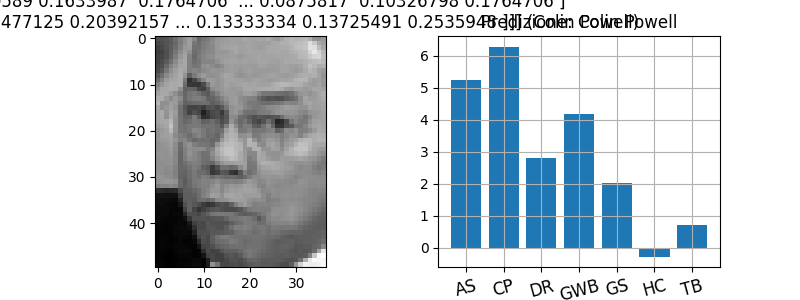

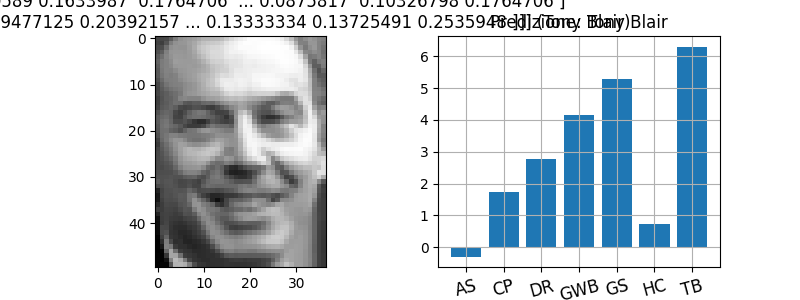

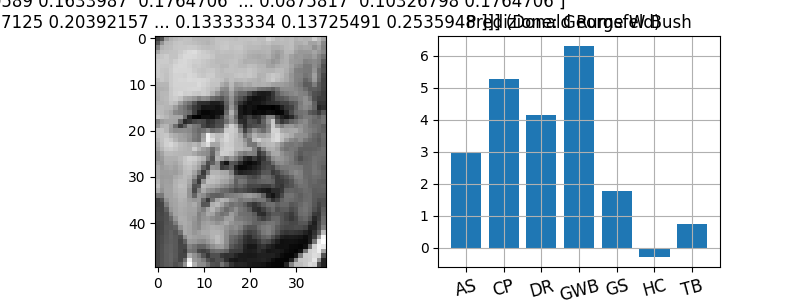

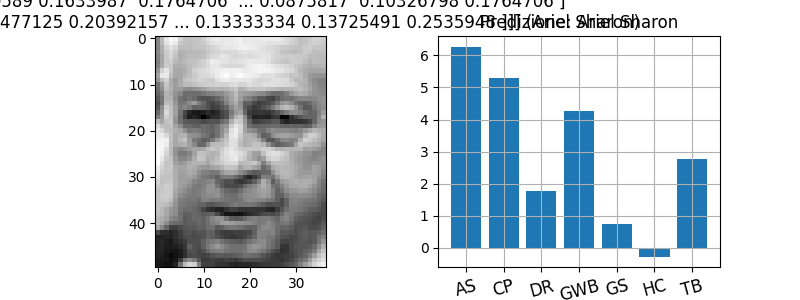

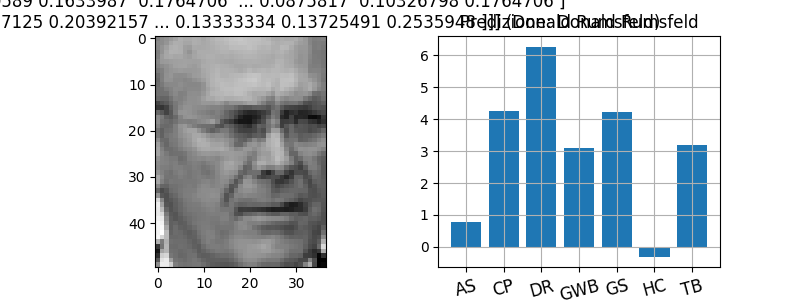

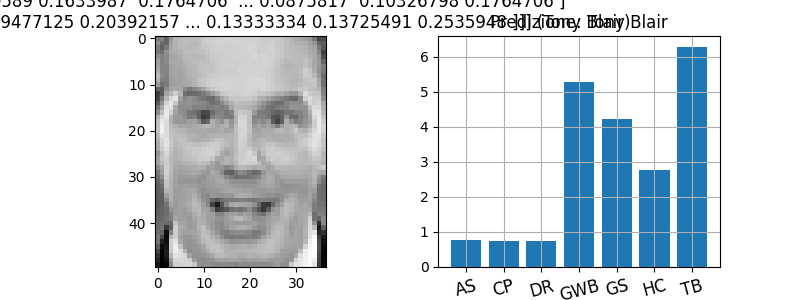

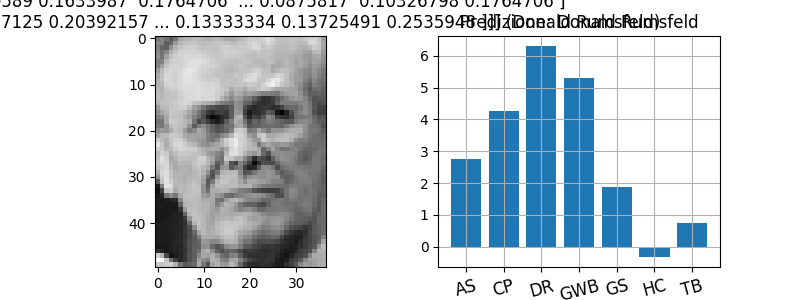

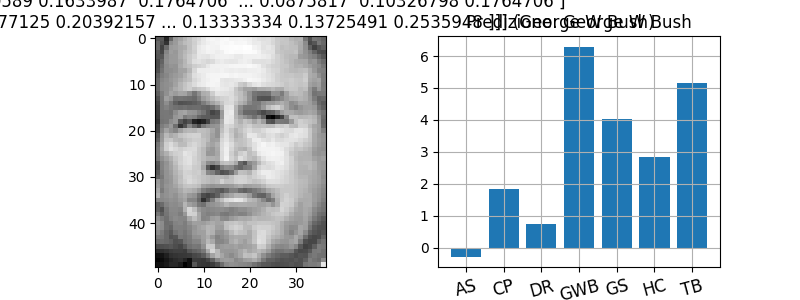

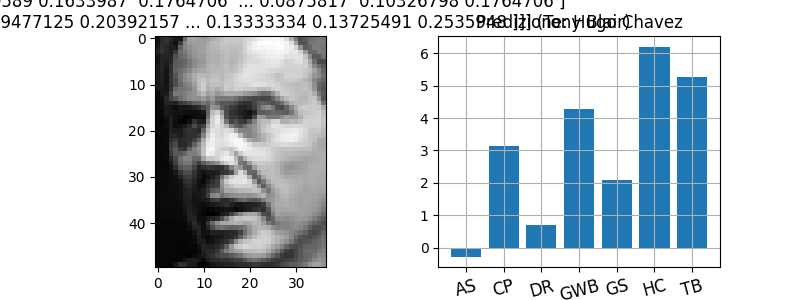

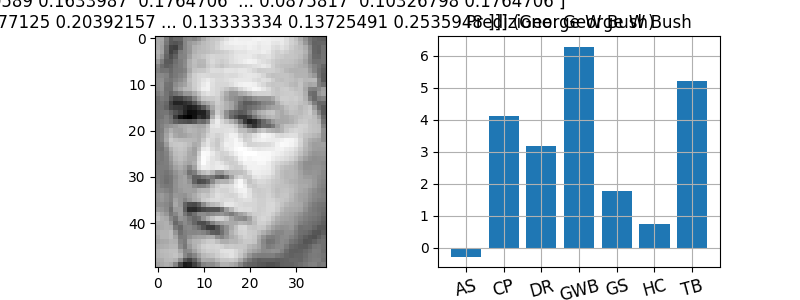

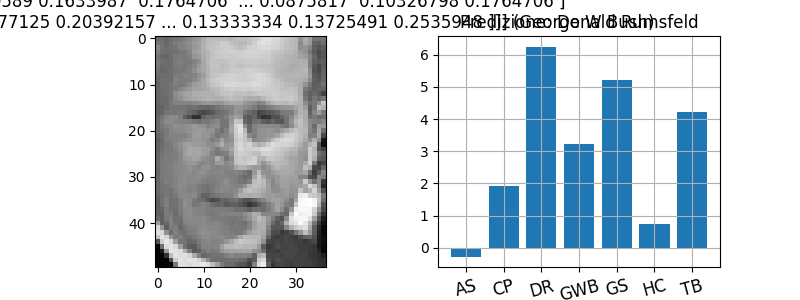

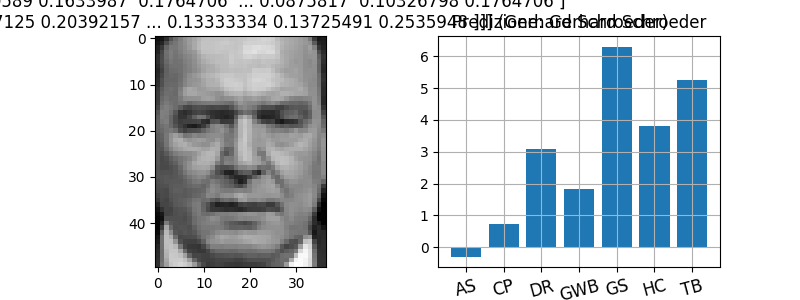

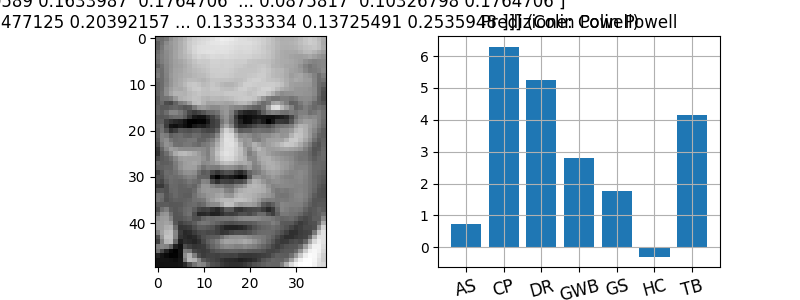

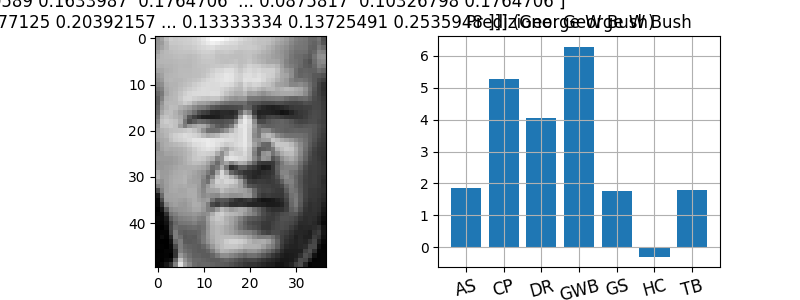

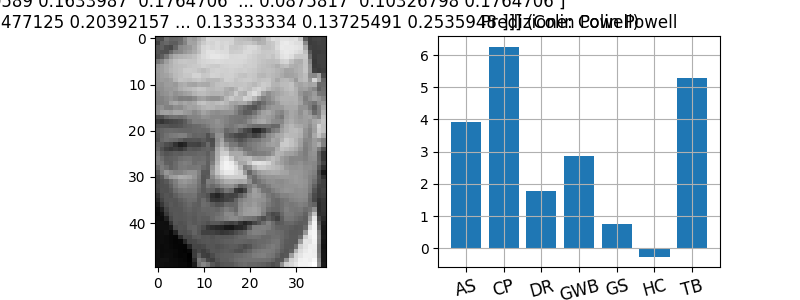

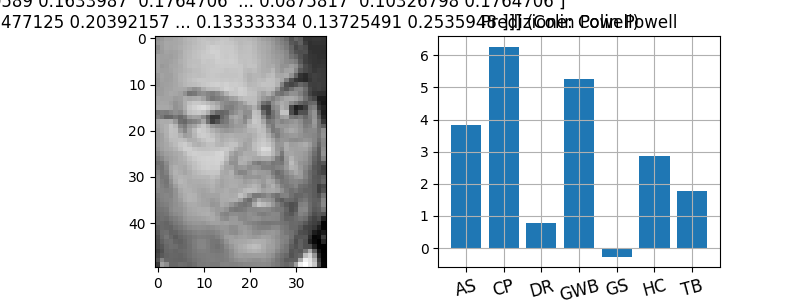

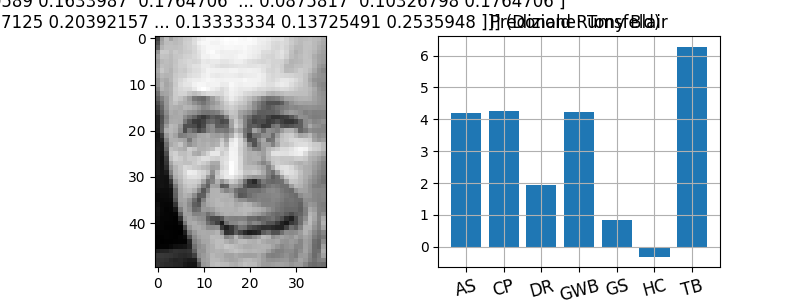

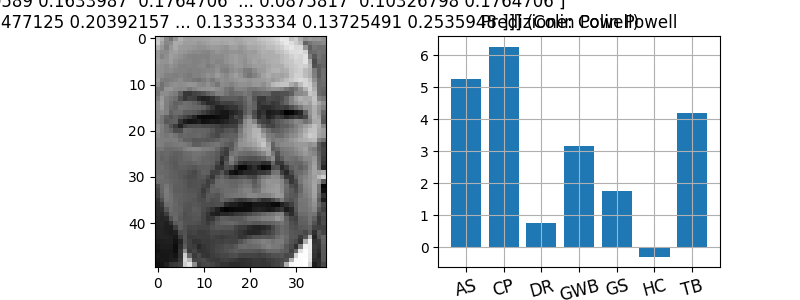

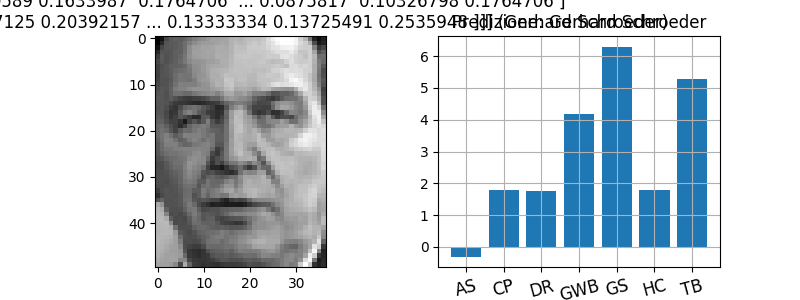

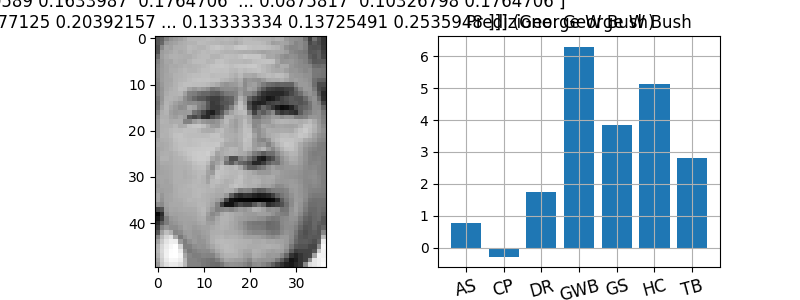

In [9]:
# Abbreviazione nomi per etichette in barplot
face_tnames_short = []
for name in face_tnames:
    name_split = name.split(' ')
    nm = ''
    for word in name_split:
        nm = nm + word[0]
    face_tnames_short.append(nm)

# Selezione di "n_randsamples" volti random dal dataset

n_randsamples = 25
ind_test_rand = np.random.choice(len(ind_test), n_randsamples, replace=False)
ind_test_rand = ind_test[ind_test_rand]

# Matrice delle n_randsamples volti scelti (una riga, un volto)
rand_faces = face_data[ind_test_rand, :]

# Decision Function per i volti random:
rand_faces_decision = svm_gs.best_estimator_.decision_function(rand_faces)
y_pred_rand_faces = svm_gs.best_estimator_.predict(rand_faces)

for i in range(n_randsamples):
    fig, axs = plt.subplots(1, 2, figsize=(8, 3))
    ii = ind_test_rand[i]
    face_ii = face_images[ii]
    
    axs[0].imshow(face_ii, cmap=plt.cm.gray)
    axs[0].set_title('Volto {} ({})'.format(face_images, face_tnames[face_targets[ii]]))
    
    axs[1].bar(np.arange(len(face_tnames)),
               rand_faces_decision[i, :]
              )
    axs[1].grid()
    axs[1].set_xticks(np.arange(len(face_tnames)))
    axs[1].set_xticklabels(face_tnames_short,
                           rotation=15,
                           fontsize=12
                          )
    axs[1].set_title('Predizione: {}'.format(face_tnames[y_pred_rand_faces[i]]))
    
plt.show()